In [1]:
# read the image
# using matplotlib
from matplotlib import image
from matplotlib import pyplot
import os
import numpy as np

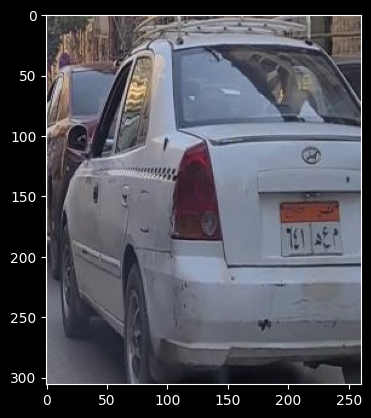

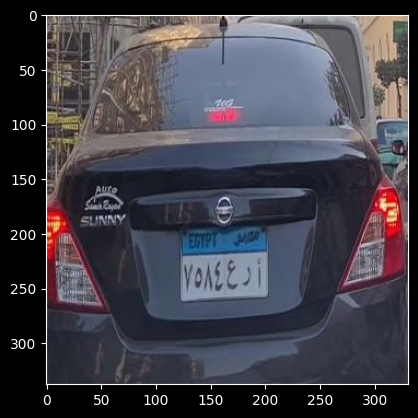

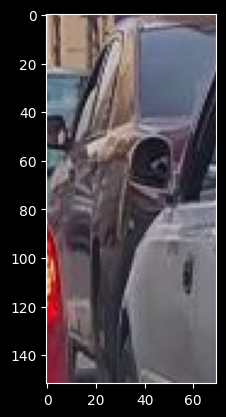

In [2]:
##read the croped images and predict the car model
cars = []
for filename in os.listdir('temp'):
    file_path = os.path.join('temp', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    cars.append(data)
    #print(corped_cars)

In [3]:
! yolo task=detect \
mode=predict \
model=Recognizers/polo.pt \
conf=0.25 \
source='temp'

Ultralytics YOLOv8.0.96 🚀 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/3 /run/media/ahmed/Hay/Egyptian cars plate recognizer/Egyptian cars plate recognizer/temp/car0.jpg: 608x544 1 plate, 70.1ms
image 2/3 /run/media/ahmed/Hay/Egyptian cars plate recognizer/Egyptian cars plate recognizer/temp/car1.jpg: 608x608 1 plate, 22.5ms
image 3/3 /run/media/ahmed/Hay/Egyptian cars plate recognizer/Egyptian cars plate recognizer/temp/car2.jpg: 608x288 (no detections), 56.4ms
Speed: 8.2ms preprocess, 49.7ms inference, 12.9ms postprocess per image at shape (1, 3, 608, 608)
Results saved to runs/detect/predict2


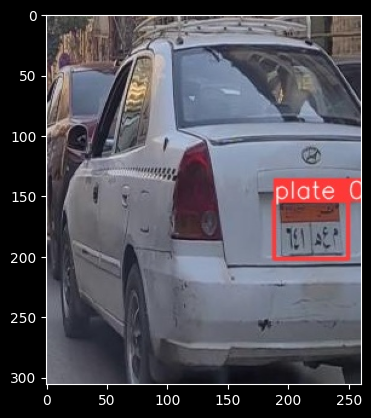

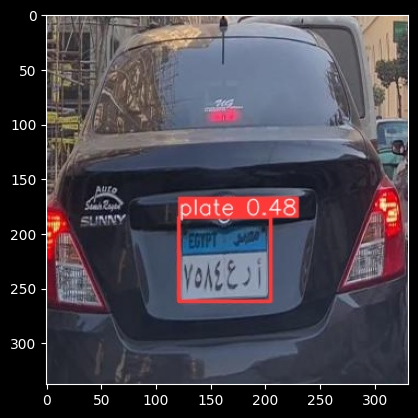

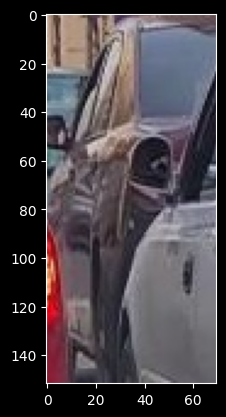

In [4]:
##read the croped images and predict the car model
pltes_pe = []
for filename in os.listdir('runs/detect/predict2'):
    file_path = os.path.join('runs/detect/predict2', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    pltes_pe.append(data)
    #print(corped_cars)

In [5]:
# read polo model ==> car's plate reconizer using yolov8
from ultralytics import YOLO

polo = YOLO("Recognizers/polo.pt")

In [6]:
# get paltes from the car xywh
plates = []
for i in range(len(cars)):
    plate = polo(cars[i])
    print(plate[0].boxes.xywh)
    plates.append(plate[0].boxes.xywh)




0: 608x544 3 plates, 43.4ms
Speed: 4.0ms preprocess, 43.4ms inference, 19.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 plates, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x288 (no detections), 41.1ms
Speed: 1.0ms preprocess, 41.1ms inference, 0.4ms postprocess per image at shape (1, 3, 608, 608)


tensor([[218.1288, 175.6382,  57.3947,  55.6060],
        [247.4165,  11.0870,  27.1671,  20.7762],
        [217.3057, 165.0892,  52.2953,  35.2961]], device='cuda:0')
tensor([[160.4170, 219.4512, 108.1299,  99.5326],
        [160.9580, 225.6767,  95.9926,  75.2253]], device='cuda:0')
tensor([], device='cuda:0', size=(0, 4))


In [7]:
plates

[tensor([[218.1288, 175.6382,  57.3947,  55.6060],
         [247.4165,  11.0870,  27.1671,  20.7762],
         [217.3057, 165.0892,  52.2953,  35.2961]], device='cuda:0'),
 tensor([[160.4170, 219.4512, 108.1299,  99.5326],
         [160.9580, 225.6767,  95.9926,  75.2253]], device='cuda:0'),
 tensor([], device='cuda:0', size=(0, 4))]

In [8]:
# remove empty plates with nelement() == 0
plates = [plate for plate in plates if plate.nelement() != 0]
plates


[tensor([[218.1288, 175.6382,  57.3947,  55.6060],
         [247.4165,  11.0870,  27.1671,  20.7762],
         [217.3057, 165.0892,  52.2953,  35.2961]], device='cuda:0'),
 tensor([[160.4170, 219.4512, 108.1299,  99.5326],
         [160.9580, 225.6767,  95.9926,  75.2253]], device='cuda:0')]

In [9]:
# crop the cars from the image and add them to temp_plates folder

import cv2
import os

# Create target Directory if don't exist
if not os.path.exists('temp_plates'):
    os.mkdir('temp_plates')
    print("Directory " , 'temp_plates' ,  " Created ")
else:
    print("Directory " , 'temp_plates' ,  " already exists")
    # remove all files in temp folder
    for filename in os.listdir('temp_plates'):
        file_path = os.path.join('temp_plates', filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))


Directory  temp_plates  Created 


In [10]:
cars_having_plates = []
for i in range(len(plates)):
    cars_having_plates.append(cars[i])
    

In [11]:
# crop each plate from the cars_having_plates and save it in temp_plates folder
for i in range(len(plates)):
    #image
    img = cars_having_plates[i]
    #xywh
    x, y, w, h = plates[i][0]
    x_top_left= int(x - w/2)
    y_top_left= int(y - h/2)
    x_bottom_right= int(x + w/2)
    y_bottom_right= int(y + h/2)
    #crop
    crop_img = img[y_top_left:y_bottom_right, x_top_left:x_bottom_right]
    #save
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite('temp_plates/plate'+str(i)+'.jpg', crop_img)
    #print(crop_img.shape)
    #print(crop_img)
    

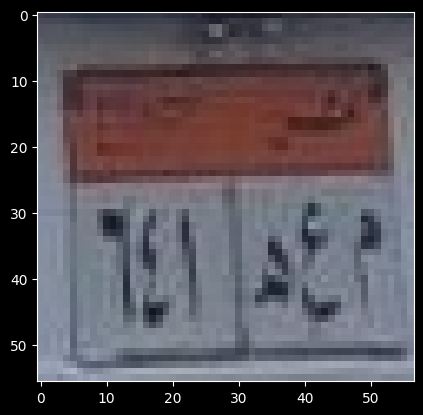

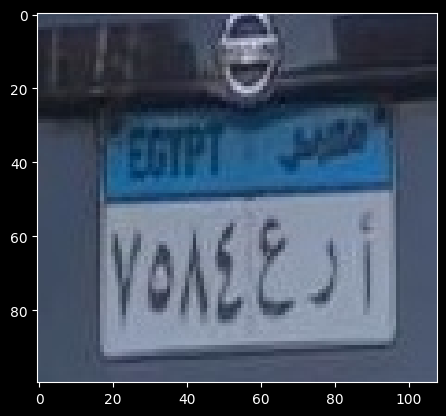

In [12]:
# read the croped images and predict the car model
corped_cars = []
for filename in os.listdir('temp_plates'):
    file_path = os.path.join('temp_plates', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    corped_cars.append(data)
    #print(corped_cars)